In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [20]:
df1 = pd.read_csv('welfake.csv')


In [4]:
df1.drop(["Unnamed: 0"], axis=1, inplace=True)


In [5]:
df1 = df1.fillna('')


In [6]:
df1["title_text"] = df1["title"] + df1["text"]


In [7]:
df1["body_len"] = df1["title_text"].apply(lambda x: len(x) - x.count(" "))


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size=0.33, random_state=53)


In [9]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [10]:
# Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred_nb = nb_classifier.predict(count_test)


In [13]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(count_train, y_train)
pred_dt = dt_classifier.predict(count_test)

In [14]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(count_train, y_train)
pred_logreg = logreg.predict(count_test)

C:\Users\Dot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print("Multinomial Naive Bayes:")
print(classification_report(y_test, pred_nb))

Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11640
           1       0.91      0.87      0.89     12165

    accuracy                           0.89     23805
   macro avg       0.89      0.89      0.89     23805
weighted avg       0.89      0.89      0.89     23805



In [16]:
print("Decision Tree Classifier:")
print(classification_report(y_test, pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     11640
           1       0.91      0.93      0.92     12165

    accuracy                           0.92     23805
   macro avg       0.92      0.92      0.92     23805
weighted avg       0.92      0.92      0.92     23805



In [17]:
print("Logistic Regression:")
print(classification_report(y_test, pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11640
           1       0.94      0.96      0.95     12165

    accuracy                           0.95     23805
   macro avg       0.95      0.95      0.95     23805
weighted avg       0.95      0.95      0.95     23805



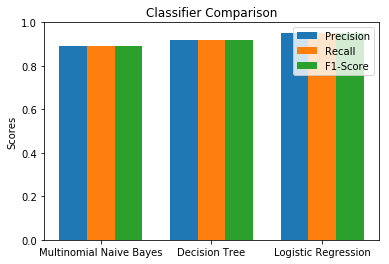

In [21]:
# Create comparison graph
labels = ['Multinomial Naive Bayes',  'Decision Tree', 'Logistic Regression']
precision_scores = [precision_score(y_test, pred_nb, average='weighted'), 
                    precision_score(y_test, pred_dt, average='weighted'), precision_score(y_test, pred_logreg, average='weighted')]
recall_scores = [recall_score(y_test, pred_nb, average='weighted'), 
                 recall_score(y_test, pred_dt, average='weighted'), recall_score(y_test, pred_logreg, average='weighted')]
f1_scores = [f1_score(y_test, pred_nb, average='weighted'),
             f1_score(y_test, pred_dt, average='weighted'), f1_score(y_test, pred_logreg, average='weighted')]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
precision_bars = ax.bar(x - width, precision_scores, width, label='Precision')
recall_bars = ax.bar(x, recall_scores, width, label='Recall')
f1_bars = ax.bar(x + width, f1_scores, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Classifier Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()